# Bangladesh House Price Analysis

Dataset Link: https://www.kaggle.com/datasets/ijajdatanerd/property-listing-data-in-bangladesh


In [1]:
#importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#getting data

df = pd.read_csv("C:/Users/HP/Desktop/Projects/bProperty/property_listing_data_in_Bangladesh.csv")
df.head()

,title,beds,bath,area,adress,type,purpose,flooPlan,url,lastUpdated,price
0,Eminent Apartment Of 2200 Sq Ft Is Vacant For ...,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"August 13, 2022",50 Thousand
1,"Apartment Ready To Rent In South Khulshi, Near...",3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/44...,https://www.bproperty.com/en/property/details-...,"January 25, 2022",30 Thousand
2,"Smartly priced 1950 SQ FT apartment, that you ...",3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/11...,https://www.bproperty.com/en/property/details-...,"February 22, 2023",30 Thousand
3,2000 Sq Ft Residential Apartment Is Up For Ren...,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/14...,https://www.bproperty.com/en/property/details-...,"October 28, 2021",35 Thousand
4,Strongly Structured This 1650 Sq. ft Apartment...,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,For Rent,https://images-cdn.bproperty.com/thumbnails/10...,https://www.bproperty.com/en/property/details-...,"February 19, 2023",25 Thousand


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7557 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7557 non-null   object
 1   beds         7557 non-null   object
 2   bath         7557 non-null   object
 3   area         7557 non-null   object
 4   adress       7557 non-null   object
 5   type         7557 non-null   object
 6   purpose      7557 non-null   object
 7   flooPlan     7556 non-null   object
 8   url          7557 non-null   object
 9   lastUpdated  7557 non-null   object
 10  price        7557 non-null   object
dtypes: object(11)
memory usage: 649.6+ KB


In [4]:
df.columns

Index(['title', 'beds', 'bath', 'area', 'adress', 'type', 'purpose',
       'flooPlan', 'url', 'lastUpdated', 'price'],
      dtype='object')

In [5]:
#checking for null values
df.isna().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       1
url            0
lastUpdated    0
price          0
dtype: int64

In [6]:
# Drop rows with any null values
df.dropna(inplace=True)

In [7]:
#checking for null values
df.isna().sum()

title          0
beds           0
bath           0
area           0
adress         0
type           0
purpose        0
flooPlan       0
url            0
lastUpdated    0
price          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7556 entries, 0 to 7556
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        7556 non-null   object
 1   beds         7556 non-null   object
 2   bath         7556 non-null   object
 3   area         7556 non-null   object
 4   adress       7556 non-null   object
 5   type         7556 non-null   object
 6   purpose      7556 non-null   object
 7   flooPlan     7556 non-null   object
 8   url          7556 non-null   object
 9   lastUpdated  7556 non-null   object
 10  price        7556 non-null   object
dtypes: object(11)
memory usage: 708.4+ KB


In [9]:
# Count the occurrences of each purpose
purpose_counts = df['purpose'].value_counts()
print(purpose_counts)

For Rent    7556
Name: purpose, dtype: int64


In [10]:
#droping unnessary coloumns

df.drop(["title","flooPlan","url","purpose"],axis = 1, inplace = True)
print(df.info())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7556 entries, 0 to 7556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   beds         7556 non-null   object
 1   bath         7556 non-null   object
 2   area         7556 non-null   object
 3   adress       7556 non-null   object
 4   type         7556 non-null   object
 5   lastUpdated  7556 non-null   object
 6   price        7556 non-null   object
dtypes: object(7)
memory usage: 472.2+ KB
None


,beds,bath,area,adress,type,lastUpdated,price
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,"August 13, 2022",50 Thousand
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,"January 25, 2022",30 Thousand
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,"February 22, 2023",30 Thousand
3,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,"October 28, 2021",35 Thousand
4,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,"February 19, 2023",25 Thousand


In [11]:
# Find duplicate rows with all values matching
duplicated_rows = df[df.duplicated(keep='first')]
duplicate_count = duplicated_rows.shape[0]
print("Duplicate rows: ", duplicate_count)

duplicated_rows.head(10)

Duplicate rows:  1145


,beds,bath,area,adress,type,lastUpdated,price
9,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand
10,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand
16,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",21 Thousand
19,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand
20,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand
22,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",21 Thousand
31,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand
33,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",21 Thousand
71,4,4,"3,200 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,"November 28, 2021",2.5 Lakh
77,3,4,"1,850 sqft","Dhanmondi, Dhaka",Apartment,"February 19, 2023",60 Thousand


In [12]:
# Drop duplicate rows where all values match with others
df.drop_duplicates(keep='first', inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6411 entries, 0 to 7556
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   beds         6411 non-null   object
 1   bath         6411 non-null   object
 2   area         6411 non-null   object
 3   adress       6411 non-null   object
 4   type         6411 non-null   object
 5   lastUpdated  6411 non-null   object
 6   price        6411 non-null   object
dtypes: object(7)
memory usage: 400.7+ KB
None


Fixing area coloumns

In [16]:
df["area_sqft"] = df["area"].apply(lambda x: x.split(" ")[0])
df["area_sqft"][:5]
df.head(3)

,beds,bath,area,adress,type,lastUpdated,price,area_sqft
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,"August 13, 2022",50 Thousand,"2,200"
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,"January 25, 2022",30 Thousand,"1,400"
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,"February 22, 2023",30 Thousand,"1,950"


In [17]:
df["area_sqft"] = df["area_sqft"].apply(lambda x: int(x.replace(",", "")))
df.head(3)

,beds,bath,area,adress,type,lastUpdated,price,area_sqft
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,"August 13, 2022",50 Thousand,2200
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,"January 25, 2022",30 Thousand,1400
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,"February 22, 2023",30 Thousand,1950


Fixing Price coloumn

In [18]:
df["PriceUnit"] =df["price"].apply(lambda x: x.split(" ")[1])#[:5])
print(df["PriceUnit"].value_counts())

df[df['PriceUnit'] == "Thousand"]
df[3:8]

Thousand    6022
Lakh         389
Name: PriceUnit, dtype: int64


,beds,bath,area,adress,type,lastUpdated,price,area_sqft,PriceUnit
3,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,"October 28, 2021",35 Thousand,2000,Thousand
4,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,"February 19, 2023",25 Thousand,1650,Thousand
5,5,5,"3,400 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,"February 14, 2023",1.1 Lakh,3400,Lakh
6,3,3,"1,600 sqft","Sector 6, Uttara, Dhaka",Apartment,"August 6, 2022",35 Thousand,1600,Thousand
7,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand,1250,Thousand


In [19]:
df['Price'] = df['price'].apply(lambda x: float(x.split(" ")[0])*1000 if x.split(" ")[1] == "Thousand" else float(x.split(" ")[0]) *100000)
df.head(10)

,beds,bath,area,adress,type,lastUpdated,price,area_sqft,PriceUnit,Price
0,3,4,"2,200 sqft","Block A, Bashundhara R-A, Dhaka",Apartment,"August 13, 2022",50 Thousand,2200,Thousand,50000.0
1,3,4,"1,400 sqft","South Khulshi, Khulshi, Chattogram",Apartment,"January 25, 2022",30 Thousand,1400,Thousand,30000.0
2,3,4,"1,950 sqft","Block F, Bashundhara R-A, Dhaka",Apartment,"February 22, 2023",30 Thousand,1950,Thousand,30000.0
3,3,3,"2,000 sqft","Sector 9, Uttara, Dhaka",Apartment,"October 28, 2021",35 Thousand,2000,Thousand,35000.0
4,3,4,"1,650 sqft","Block I, Bashundhara R-A, Dhaka",Apartment,"February 19, 2023",25 Thousand,1650,Thousand,25000.0
5,5,5,"3,400 sqft","Gulshan 1, Gulshan, Dhaka",Apartment,"February 14, 2023",1.1 Lakh,3400,Lakh,110000.0
6,3,3,"1,600 sqft","Sector 6, Uttara, Dhaka",Apartment,"August 6, 2022",35 Thousand,1600,Thousand,35000.0
7,3,3,"1,250 sqft","Block K, Bashundhara R-A, Dhaka",Apartment,"January 4, 2023",23 Thousand,1250,Thousand,23000.0
8,3,4,"2,150 sqft","Sector 10, Uttara, Dhaka",Apartment,"June 28, 2022",40 Thousand,2150,Thousand,40000.0
11,3,3,"1,580 sqft","Bayazid, Chattogram",Apartment,"January 15, 2023",20 Thousand,1580,Thousand,20000.0


In [20]:
# Drop columns
df.drop(['area', 'PriceUnit', 'price','lastUpdated'], axis=1, inplace=True)

# Replace column names
df.rename(columns={'Price': 'price', 'adress': 'address'}, inplace=True)

df.head(10)

,beds,bath,address,type,area_sqft,price
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,50000.0
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,1400,30000.0
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,1950,30000.0
3,3,3,"Sector 9, Uttara, Dhaka",Apartment,2000,35000.0
4,3,4,"Block I, Bashundhara R-A, Dhaka",Apartment,1650,25000.0
5,5,5,"Gulshan 1, Gulshan, Dhaka",Apartment,3400,110000.0
6,3,3,"Sector 6, Uttara, Dhaka",Apartment,1600,35000.0
7,3,3,"Block K, Bashundhara R-A, Dhaka",Apartment,1250,23000.0
8,3,4,"Sector 10, Uttara, Dhaka",Apartment,2150,40000.0
11,3,3,"Bayazid, Chattogram",Apartment,1580,20000.0


In [27]:
# Count the occurrences of each purpose
beds_counts = df['beds'].value_counts()
print(beds_counts)

3        3625
2        2136
4         461
1 Bed     119
5          44
7          10
6           8
21          2
20          2
17          1
32          1
22          1
36          1
Name: beds, dtype: int64


In [28]:
df["Beds"] = df["beds"].apply(lambda x: x.split(" ")[0])

beds_counts = df['Beds'].value_counts()
print(beds_counts)

df.head(3)

3     3625
2     2136
4      461
1      119
5       44
7       10
6        8
21       2
20       2
17       1
32       1
22       1
36       1
Name: Beds, dtype: int64


,beds,bath,address,type,area_sqft,price,Beds
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,50000.0,3
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,1400,30000.0,3
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,1950,30000.0,3


In [29]:
df["Bath"] = df["bath"].apply(lambda x: x.split(" ")[0])

baths_counts = df['Bath'].value_counts()
print(baths_counts)

df.head(3)

3     2530
2     2520
4      850
1      361
5      115
6       14
8       10
10       8
7        3
Name: Bath, dtype: int64


,beds,bath,address,type,area_sqft,price,Beds,Bath
0,3,4,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,50000.0,3,4
1,3,4,"South Khulshi, Khulshi, Chattogram",Apartment,1400,30000.0,3,4
2,3,4,"Block F, Bashundhara R-A, Dhaka",Apartment,1950,30000.0,3,4


In [30]:
# Drop columns
df.drop(['beds', 'bath'], axis=1, inplace=True)
df.head(2)

,address,type,area_sqft,price,Beds,Bath
0,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,50000.0,3,4
1,"South Khulshi, Khulshi, Chattogram",Apartment,1400,30000.0,3,4


In [31]:
# Replace column names
df.rename(columns={'Beds': 'beds', 'Bath': 'bath'}, inplace=True)
# Convert "price" column to integer data type
df['price'] = df['price'].astype(int)

df.head(3)

,address,type,area_sqft,price,beds,bath
0,"Block A, Bashundhara R-A, Dhaka",Apartment,2200,50000,3,4
1,"South Khulshi, Khulshi, Chattogram",Apartment,1400,30000,3,4
2,"Block F, Bashundhara R-A, Dhaka",Apartment,1950,30000,3,4


Extract specific location from the address column:

In [63]:
df["city"] = df['address'].apply(lambda x: x.split(" ")[-1])
df.head(2)

KeyError: 'address'

In [34]:
df["city"].value_counts()

Dhaka         4443
Chattogram    1968
Name: city, dtype: int64

In [62]:
def extract_city(address):
    parts = address.split(', ')
    if len(parts) >= 2:
        return parts[1]
    else:
        return ''
df['CITY'] = df['address'].apply(extract_city)
df.head(3)

KeyError: 'address'

In [64]:
# Drop columns
df.drop(['address', 'area', area2], axis=1, inplace=True)
# Replace column names
df.rename(columns={'CITY': 'area'}, inplace=True)
df.head(2)

type         0
area_sqft    0
price        0
beds         0
bath         0
city         0
area         0
dtype: int64

In [65]:
df.head(3)

,type,area_sqft,price,beds,bath,city,area
0,Apartment,2200,50000,3,4,Dhaka,Bashundhara R-A
1,Apartment,1400,30000,3,4,Chattogram,Khulshi
2,Apartment,1950,30000,3,4,Dhaka,Bashundhara R-A


# Save the DataFrame to a csv file

In [66]:
df.to_csv('preprocessed_property_listing_data_in_Bangladesh.csv', index=False)

# Data Analysis

In [67]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6411 entries, 0 to 7556
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       6411 non-null   object
 1   area_sqft  6411 non-null   int64 
 2   price      6411 non-null   int32 
 3   beds       6411 non-null   object
 4   bath       6411 non-null   object
 5   city       6411 non-null   object
 6   area       6411 non-null   object
dtypes: int32(1), int64(1), object(5)
memory usage: 375.6+ KB
None
          area_sqft         price
count   6411.000000  6.411000e+03
mean    1382.981438  3.516994e+04
std     1006.895680  6.804815e+04
min      300.000000  5.500000e+03
25%      900.000000  1.500000e+04
50%     1200.000000  2.000000e+04
75%     1550.000000  3.000000e+04
max    31500.000000  2.000000e+06


# Types of House for rent

Apartment    6344
Duplex         46
Building       21
Name: type, dtype: int64


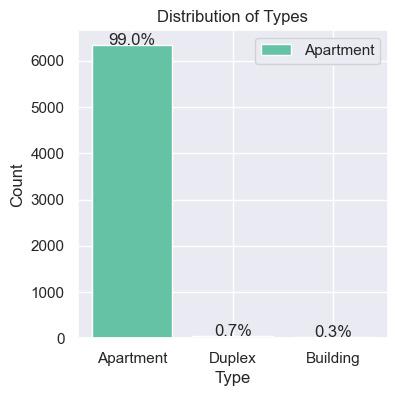

In [68]:
# Count the occurrences of each type
type_counts = df['type'].value_counts()
print(type_counts)

# Calculate the total count
total_count = type_counts.sum()

# Define a custom color palette
colors = sns.color_palette('Set2', n_colors=len(type_counts))

fig = plt.figure(figsize=(4, 4))

# Plot the bar chart with different colors
plt.bar(type_counts.index, type_counts.values, color=colors)

# Add labels and title
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Types')

# Add legend
legend_labels = type_counts.index
plt.legend(legend_labels)

# Add percentage values on top of each bar
for i, count in enumerate(type_counts.values):
    percentage = (count / total_count) * 100
    plt.text(i, count + 10, f'{percentage:.1f}%', ha='center')

# Display the plot
plt.show()

# Types of House for rent

In [70]:
h_type = df['type'].value_counts()
h_type

Apartment    6344
Duplex         46
Building       21
Name: type, dtype: int64

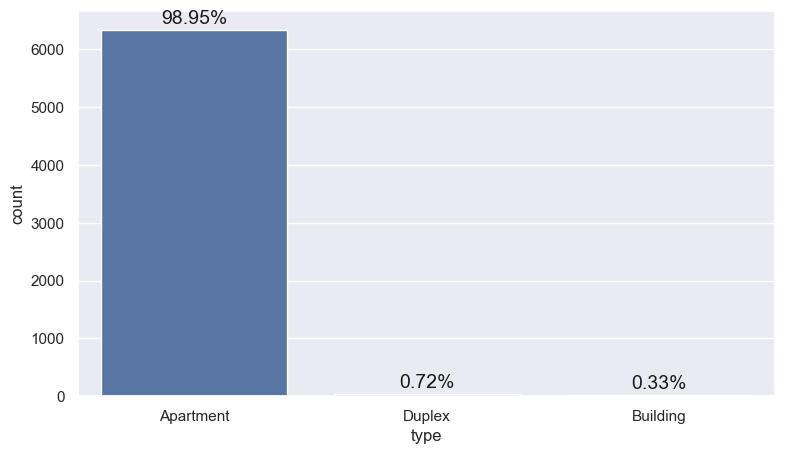

In [80]:
sns.set()
plt.figure(figsize=(9,5))
sns.countplot(x = df["type"], data = df)

for i in range(h_type.shape[0]):
    num = h_type.values[i]
    text = "{:0.2f}%".format(100*(num/df.shape[0]))
    plt.text(i,num+100, text, ha= "center", color = "k",fontsize=14)

From here, we can see that 98.95% houses are Apartment and a small portion of the houses are Duplex and Building

# Average price according to apartment type

In [75]:
df.groupby(df['type'])["price"].mean()

type
Apartment     31637.214849
Building     666666.666667
Duplex       234086.956522
Name: price, dtype: float64

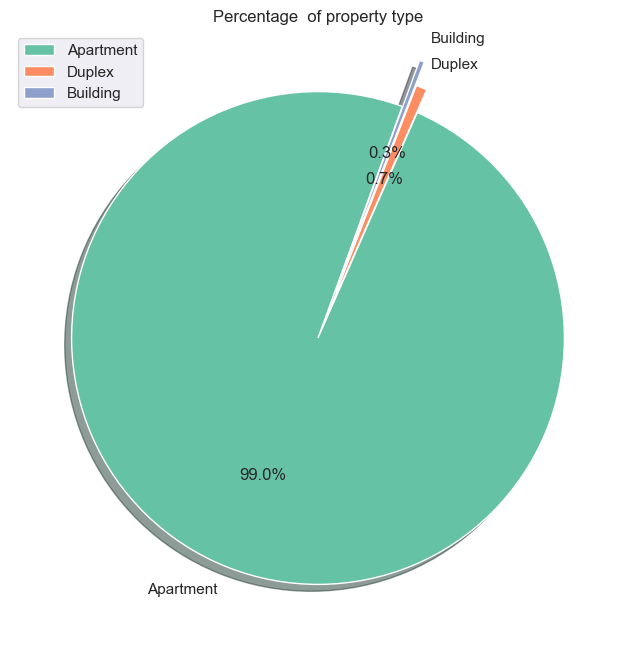

In [77]:
color = colors
plt.rcParams["figure.figsize"] = (10,8)
labels = list(df['type'].value_counts().keys())
df['type'].value_counts().plot.pie(y="type",startangle=70, colors = color, explode = (0,0.1,0.2), shadow = True, autopct = "%0.1f%%")
plt.title("Percentage  of property type")
plt.legend(labels,loc = "upper left")
plt.axis("off")
plt.show()

So, the average price of apartment is `31637`
Building: `666666`
Duplex: `234086`

No wonder the percentage of apartment is `98.95%`, because they are way more `cheaper` than building and duplex.

# Area VS Price

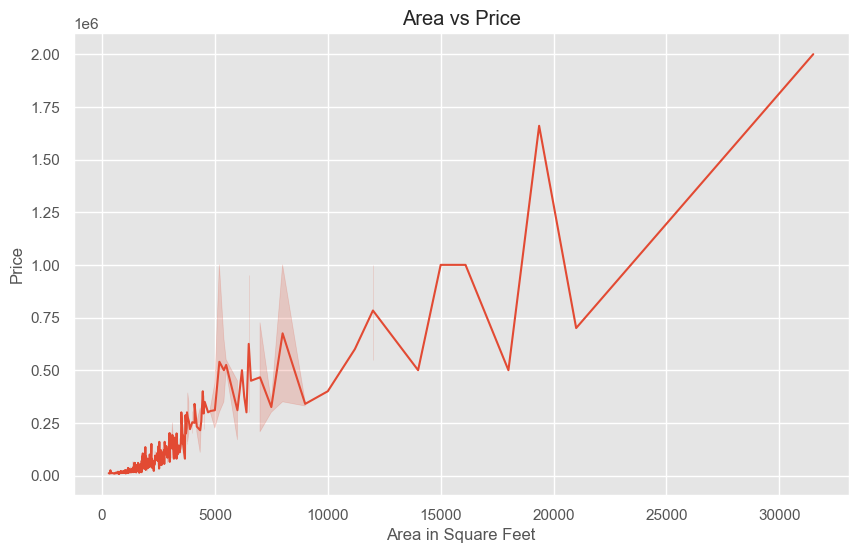

In [84]:
plt.figure(figsize = (10,6))
plt.style.use("ggplot")
sns.lineplot(x=df["area_sqft"], y = df["price"])
plt.title("Area vs Price")
plt.xlabel("Area in Square Feet")
plt.ylabel("Price")
plt.show()

As area of the property increases the price is also increases along with it.

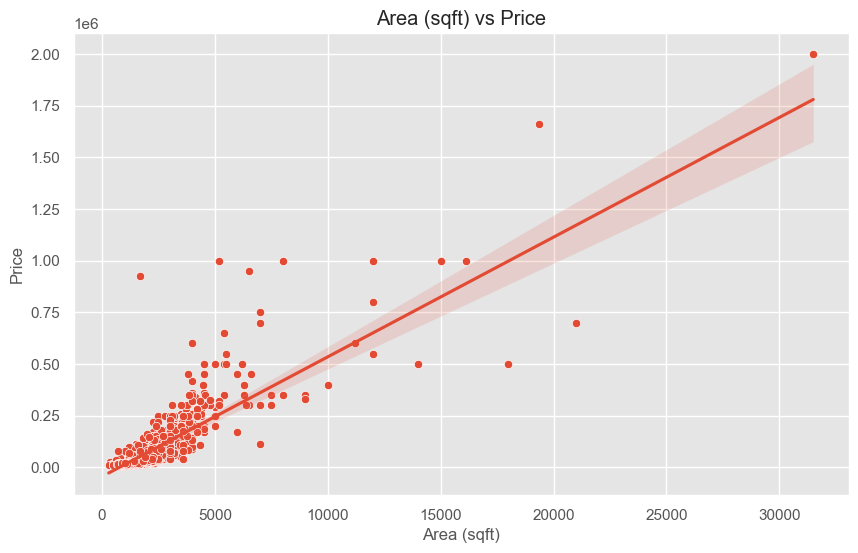

In [85]:
# Creating a scatter plot
fig = plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area_sqft', y='price')

# Adding a regression line to show how the price is rising
sns.regplot(data=df, x='area_sqft', y='price', scatter=False)

# Adding labels and title to the plot
plt.xlabel('Area (sqft)')
plt.ylabel('Price')
plt.title('Area (sqft) vs Price')

# Displaying the plot
plt.show()

In [89]:
# groupby apartment type according to location:


a = df.groupby(["city","type"])["price"].mean()
a = a.to_frame()
a = a.reset_index(level=["city","type"])
a

,city,type,price
0,Chattogram,Apartment,19542.887755
1,Chattogram,Building,70000.000000
2,Chattogram,Duplex,105714.285714
3,Dhaka,Apartment,37044.350137
4,Dhaka,Building,696500.000000
5,Dhaka,Duplex,257128.205128


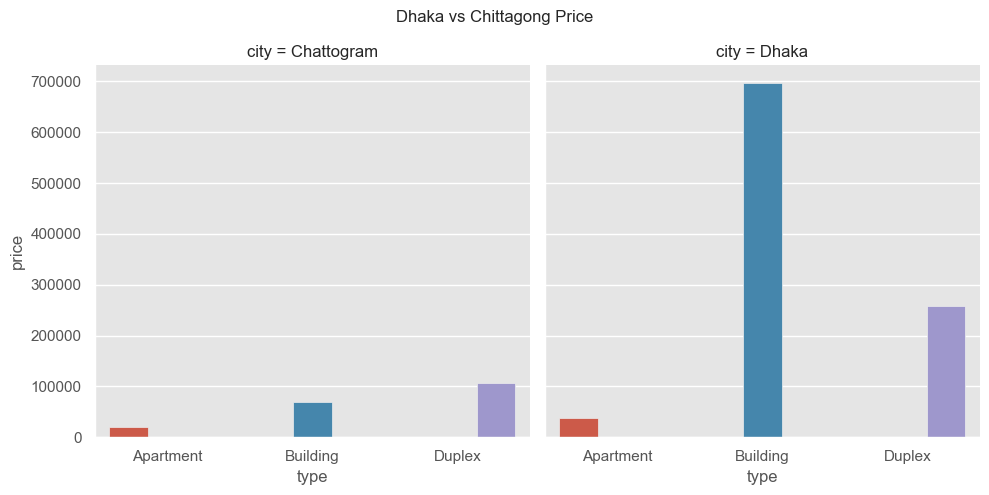

In [90]:
plt.rcParams['figure.figsize'] = (9,8)
sns.catplot(x = "type", y = "price", col = "city", hue = "type",
            data = a, kind = "bar")
plt.suptitle("Dhaka vs Chittagong Price")
plt.tight_layout()
plt.show()

We can see that, the average price difference between Dhaka and Chittagong is very high. `Dhaka` is way more `expensive` than `Chittagong`.

# Dhaka vs Chittagong Price Heatmap

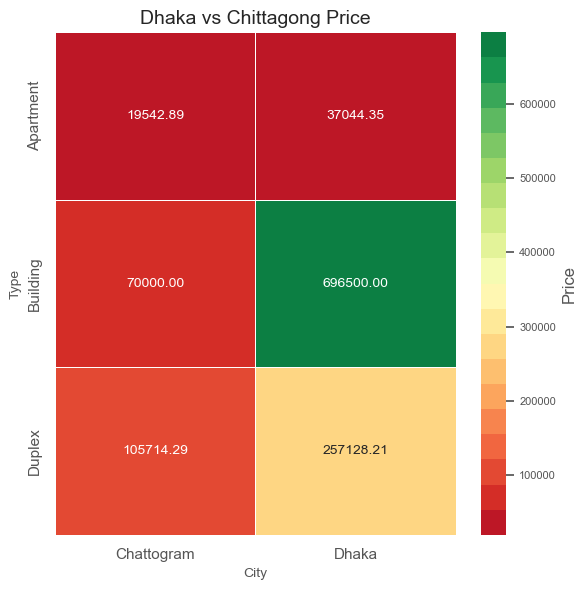

In [100]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Create the pivot table
pivot_table = df.pivot_table(values='price', index='type', columns='city')

# Create the heatmap
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=colors, linewidths=0.5, linecolor='white', cbar=True,
            cbar_kws={'label': 'Price'})

# Customize the axis labels
plt.xlabel('City', fontsize=10)
plt.ylabel('Type', fontsize=10)

# Set the title and adjust the font size
plt.title('Dhaka vs Chittagong Price', fontsize=14)

# Adjust the color bar ticks font size
cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

# Display the plot
plt.tight_layout()
plt.show()


# Prices according to Areas

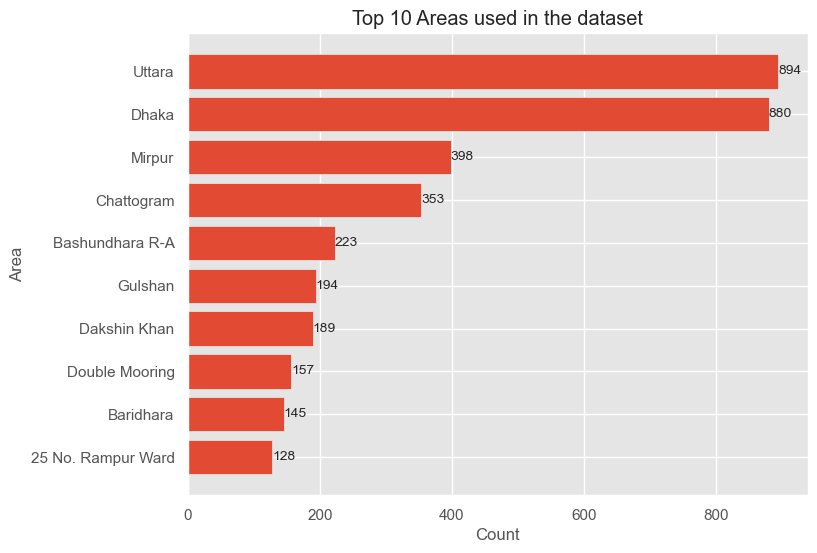

In [101]:
# Count the occurrences of each area
top_10_areas = df['area'].value_counts().head(10)

fig = plt.figure(figsize=(8, 6))
# Create the horizontal bar chart
plt.barh(top_10_areas.index, top_10_areas.values)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Area')
plt.title('Top 10 Areas used in the dataset')

# Invert the y-axis to show the highest count at the top
plt.gca().invert_yaxis()

# Add count number in front of each bar
for i, count in enumerate(top_10_areas.values):
    plt.text(count, i, str(count), ha='left', va='center')

# Display the plot
plt.show()

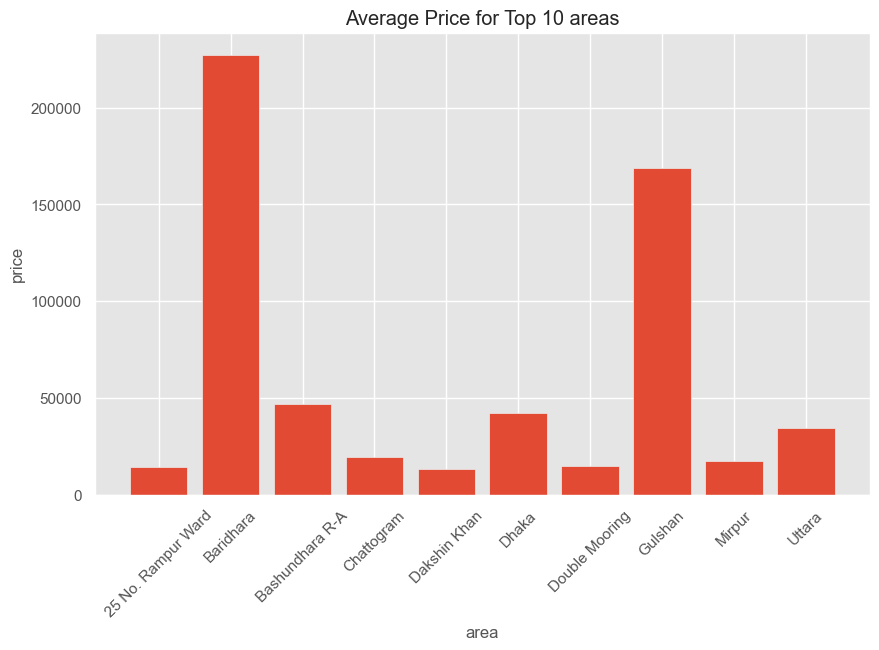

In [102]:
# Filter the DataFrame for the top 10 areas
top_10_areas = df['area'].value_counts().head(10).index

# Create a new DataFrame with only the top 10 areas
filtered_df = df[df['area'].isin(top_10_areas)]

# Group the data by region and calculate the average price
average_prices = filtered_df.groupby('area')['price'].mean()

fig = plt.figure(figsize=(10, 6))

# Create the bar chart
plt.bar(average_prices.index, average_prices.values)

# Add labels and title
plt.xlabel('area')
plt.ylabel('price')
plt.title('Average Price for Top 10 areas')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()